In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind

In [26]:
import sys
sys.path.append('../src')
from functions import *

# Loading the Data

In [27]:
sys.path.append('../src')
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control_final = pd.read_csv('..//Data/Cleaned_Data/df_control_final.csv')
pd.set_option('display.max_columns', None)

# df_control

## Check the data types

In [28]:
df_control_final.dtypes

client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
date                          object
start_step                     int64
1st_step                       int64
2nd_step                       int64
3rd_step                       int64
navigations_bt_start_last      int64
last_step                     object
completion                      bool
total_time_visit             float64
Variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age                       int64
gendr                         object
num_accts                      int64
bal                          float64
calls_6_mnth                   int64
logons_6_mnth                  int64
dtype: object

## Categorical columns

In [52]:
df_control_final

,client_id,visit_visitor_id,start_time,step_1,step_2,step_3,date,start_step,1st_step,2nd_step,3rd_step,navigations_bt_start_last,last_step,completion,total_time_visit,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,1028,557292053_87239438319_391157_42237450_62128060588,0.82,1.57,4.73,1.85,2017-04-08,1,5,2,1,7,step_1,False,8.97,Control,12,145,36,M,3,103520.22,1,4
1,1104,543158812_46395476577_767725_194240915_1815800...,0.00,0.00,0.00,0.00,2017-06-12,1,0,0,0,0,start,False,0.00,Control,5,66,48,Other,3,154643.94,6,9
2,1104,643221571_99977972121_69283_194240915_18158000533,0.00,0.00,0.00,0.00,2017-06-20,1,0,0,0,0,start,False,0.00,Control,5,66,48,Other,3,154643.94,6,9
3,1186,507052512_11309370126_442139_446844663_3161510...,0.00,0.00,0.00,0.00,2017-04-08,1,0,0,0,0,start,False,0.00,Control,8,99,22,Other,2,31662.52,0,3
4,1186,795373564_99931517312_810896_446844663_3161510...,0.18,0.18,0.00,0.00,2017-04-08,1,1,1,0,0,step_2,False,0.37,Control,8,99,22,Other,2,31662.52,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32176,9997470,761490147_96352537762_21814_395791369_55562604618,2.82,4.38,2.02,34.55,2017-05-09,6,4,2,2,4,confirm,True,43.77,Control,6,82,36,Other,2,53543.03,0,3
32177,9997470,904791598_9725982898_416914_395791369_55562604618,0.00,0.00,0.00,0.00,2017-04-20,1,0,0,0,0,start,False,0.00,Control,6,82,36,Other,2,53543.03,0,3
32178,9997470,655572400_94971272893_411965_91394485_75296404278,0.00,0.00,0.00,0.00,2017-04-07,1,0,0,0,0,start,False,0.00,Control,6,82,36,Other,2,53543.03,0,3
32179,9998346,189177304_69869411700_783154_292425655_1660713...,1.03,1.02,1.45,8.97,2017-03-29,1,2,4,4,4,step_3,False,12.47,Control,50,602,61,F,2,149881.38,6,9


In [29]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").columns


Index(['visit_visitor_id', 'date', 'last_step', 'Variation', 'gendr'], dtype='object')

In [30]:
test_categorical_columns = ['last_step', 'gendr',]

In [31]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    32181
date                   98
last_step               5
gendr                   3
Variation               1
dtype: int64

In [32]:
frequency_proportion(df_control_final, 'last_step')

Frequency:last_step
confirm    15336
start       9639
step_1      3498
step_3      2249
step_2      1459
Name: count, dtype: int64
Proportion: last_step
confirm    0.476554
start      0.299525
step_1     0.108698
step_3     0.069886
step_2     0.045337
Name: proportion, dtype: float64


In [33]:
frequency_proportion(df_control_final, 'gendr')

Frequency:gendr
M        11077
Other    10679
F        10425
Name: count, dtype: int64
Proportion: gendr
M        0.344209
Other    0.331842
F        0.323949
Name: proportion, dtype: float64


In [34]:
cross_table(df_control_final, 'start_time')

,start_time,count
0,0.00,6335
1,0.02,84
2,0.03,77
3,0.05,273
4,0.07,609
...,...,...
1116,104.58,1
1117,113.30,1
1118,147.22,1
1119,187.02,1


In [35]:
frequency_proportion(df_control_final, 'start_time')

Frequency:start_time
0.00     6335
0.15      825
0.17      793
0.13      787
0.10      761
         ... 
22.02       1
16.18       1
12.20       1
22.17       1
33.58       1
Name: count, Length: 1121, dtype: int64
Proportion: start_time
0.00     0.196855
0.15     0.025636
0.17     0.024642
0.13     0.024455
0.10     0.023647
           ...   
22.02    0.000031
16.18    0.000031
12.20    0.000031
22.17    0.000031
33.58    0.000031
Name: proportion, Length: 1121, dtype: float64


In [36]:
tab_control_last_step = cross_table(df_control_final, 'last_step')
tab_control_last_step

,last_step,count
0,confirm,15336
1,start,9639
2,step_1,3498
3,step_2,1459
4,step_3,2249


In [53]:
df_control_final['last_step'].value_counts()

last_step
confirm    15336
start       9639
step_1      3498
step_3      2249
step_2      1459
Name: count, dtype: int64

In [50]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_control_last_step['count'] / tab_control_last_step['count'].sum()).round(2)

0    0.48
1    0.30
2    0.11
3    0.05
4    0.07
Name: count, dtype: float64

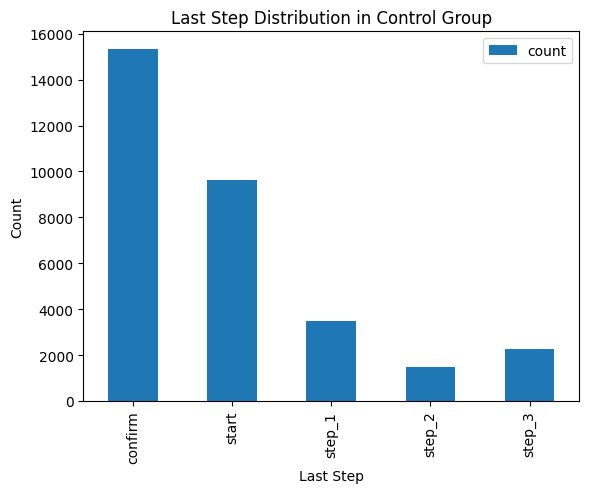

In [51]:
tab_control_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Control Group')
plt.show()

In [39]:
tab_control_gender = cross_table(df_control_final, 'gendr')
tab_control_gender

,gendr,count
0,F,10425
1,M,11077
2,Other,10679


In [40]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_control_gender['count'] / tab_control_gender['count'].sum()).round(2)

0    0.32
1    0.34
2    0.33
Name: count, dtype: float64

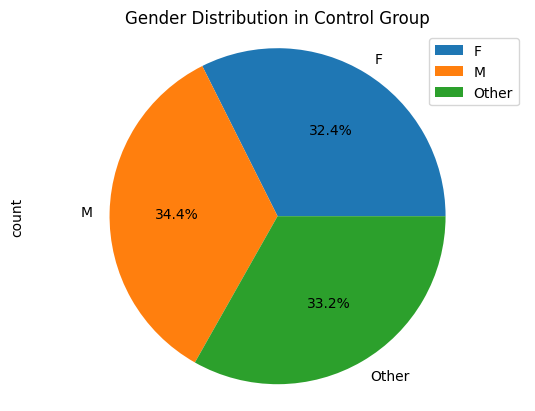

In [41]:
tab_control_gender.plot.pie(y='count', labels=tab_control_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Control Group')
plt.axis('equal')
plt.show()

## Numerical columns

In [42]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("number").columns

Index(['client_id', 'start_time', 'step_1', 'step_2', 'step_3', 'start_step',
       '1st_step', '2nd_step', '3rd_step', 'navigations_bt_start_last',
       'total_time_visit', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [43]:
df_control_final.dtypes

client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
date                          object
start_step                     int64
1st_step                       int64
2nd_step                       int64
3rd_step                       int64
navigations_bt_start_last      int64
last_step                     object
completion                      bool
total_time_visit             float64
Variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age                       int64
gendr                         object
num_accts                      int64
bal                          float64
calls_6_mnth                   int64
logons_6_mnth                  int64
dtype: object

In [44]:
control_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'bt_1', 'bt_2', 'bt_3', 'total_navigation', 'total_time_visit', 'clnt_tenure_yr','clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
control_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'bt_1',
 'bt_2',
 'bt_3',
 'total_navigation',
 'total_time_visit',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth']

In [45]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("number").nunique().sort_values(ascending=False)

client_id                    23480
bal                          23445
total_time_visit              1957
start_time                    1121
step_3                        1086
step_2                         746
step_1                         719
clnt_tenure_mnth               443
clnt_age                        79
clnt_tenure_yr                  52
start_step                      20
navigations_bt_start_last       18
2nd_step                        16
3rd_step                        15
1st_step                        12
calls_6_mnth                     7
logons_6_mnth                    7
num_accts                        6
dtype: int64

In [46]:
df_control_final.describe()

,client_id,start_time,step_1,step_2,step_3,start_step,1st_step,2nd_step,3rd_step,navigations_bt_start_last,total_time_visit,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,3.218100e+04,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,3.218100e+04,32181.000000,32181.000000
mean,5.017736e+06,1.233547,0.679618,1.155185,1.437580,1.478792,0.921569,0.804108,0.708089,0.508530,4.673618,12.347659,154.159691,48.462509,2.281470,1.632546e+05,3.335571,6.372021
std,2.871012e+06,5.622046,2.856195,2.865317,3.419863,1.214256,0.814567,0.853594,0.809779,1.261946,8.828963,7.046790,84.174236,15.796989,0.563948,3.148661e+05,2.192798,2.180042
min,1.028000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000
25%,2.529685e+06,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.370000,6.000000,82.000000,35.000000,2.000000,4.172055e+04,1.000000,4.000000
50%,5.025948e+06,0.280000,0.180000,0.650000,0.350000,1.000000,1.000000,1.000000,1.000000,0.000000,2.670000,11.000000,141.000000,50.000000,2.000000,7.024451e+04,3.000000,6.000000
75%,7.477929e+06,0.800000,0.620000,1.570000,1.530000,2.000000,1.000000,1.000000,1.000000,0.000000,5.680000,16.000000,196.000000,61.000000,2.000000,1.543138e+05,6.000000,9.000000
max,9.998921e+06,699.280000,268.300000,362.720000,121.130000,32.000000,16.000000,24.000000,24.000000,20.000000,699.420000,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000


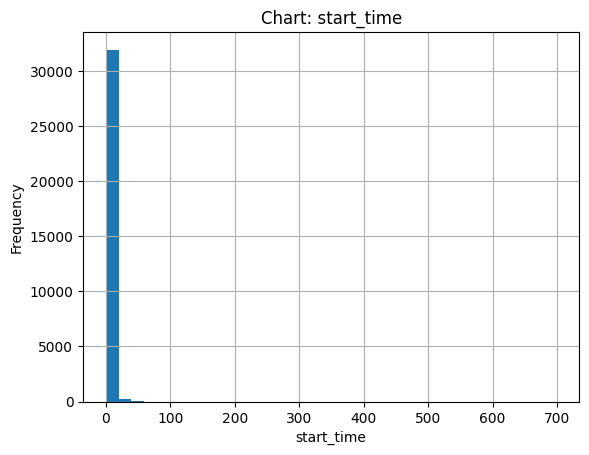

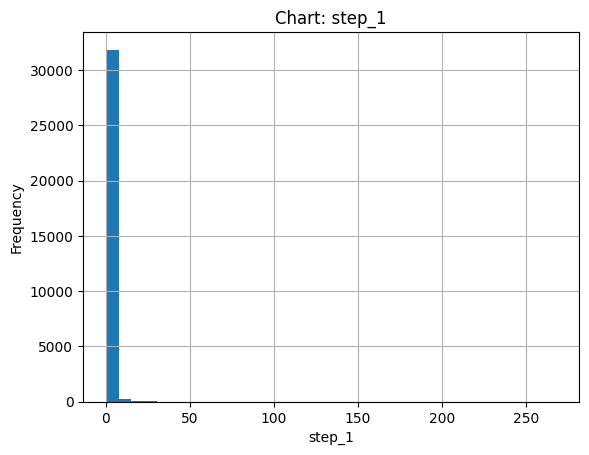

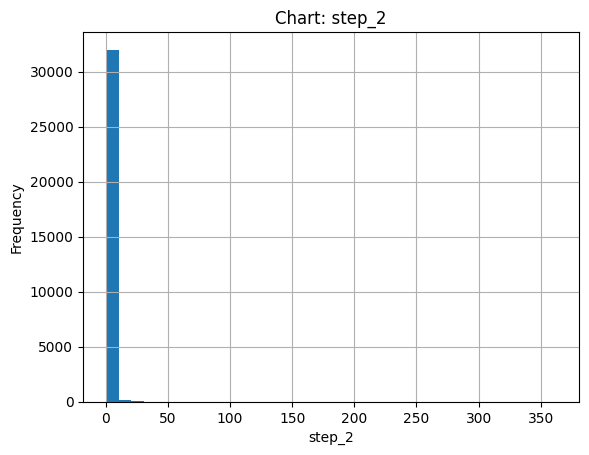

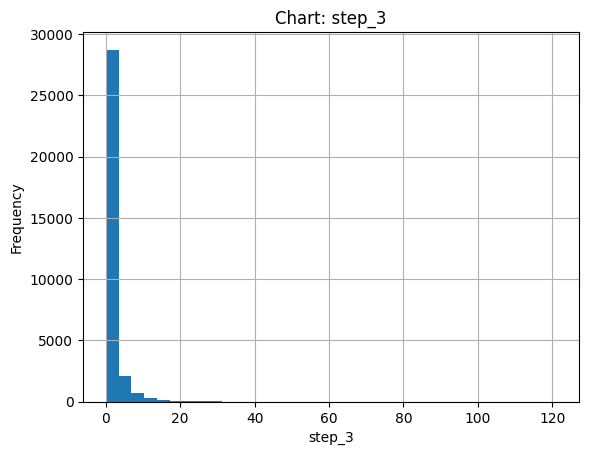

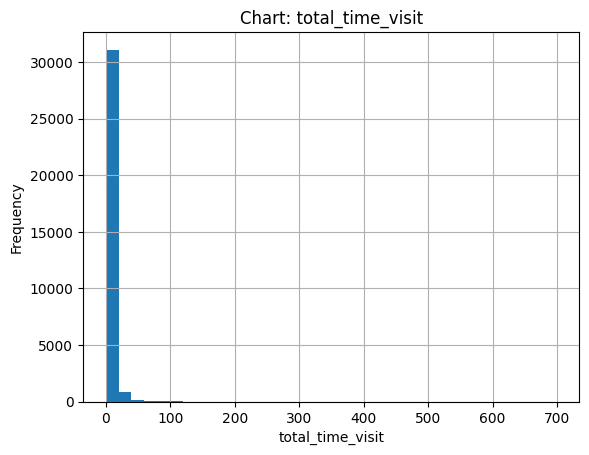

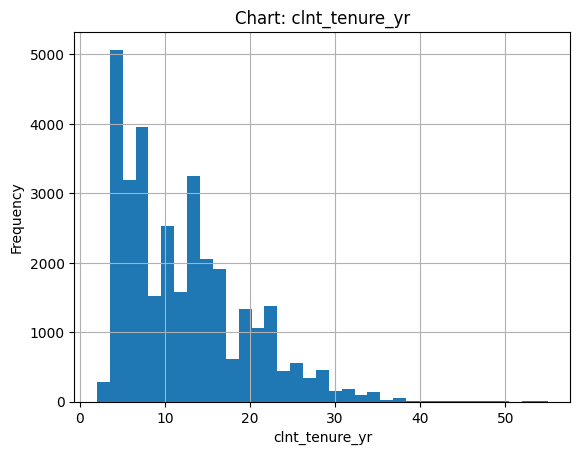

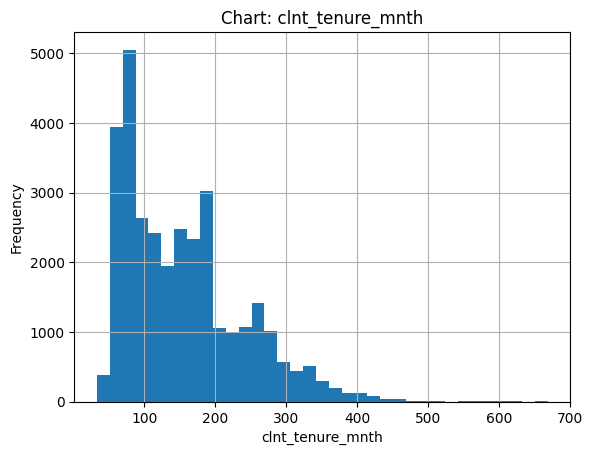

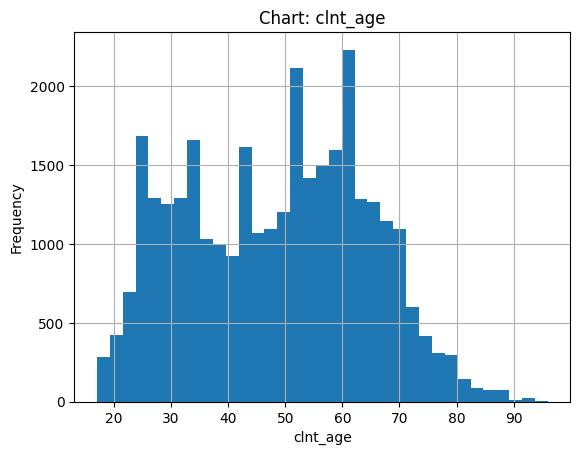

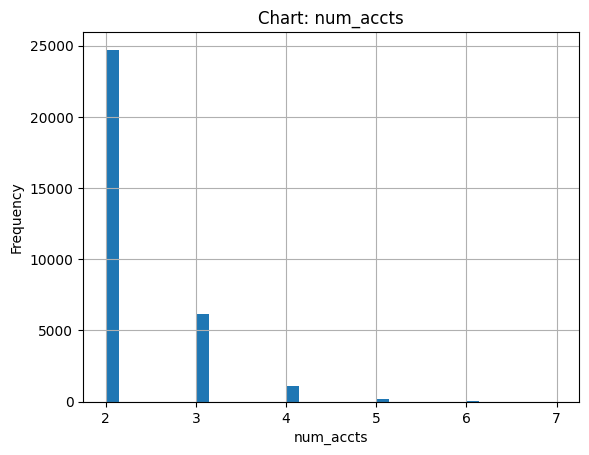

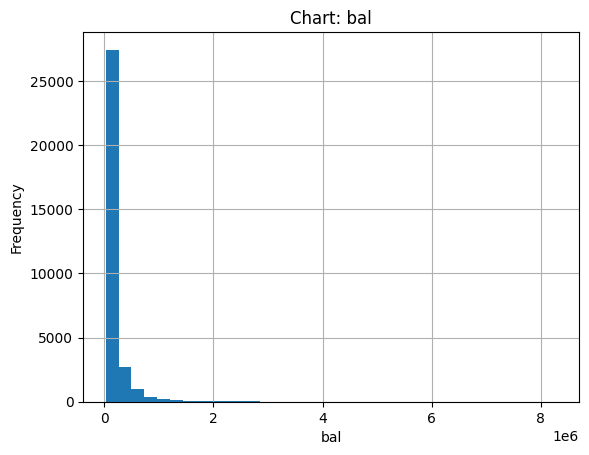

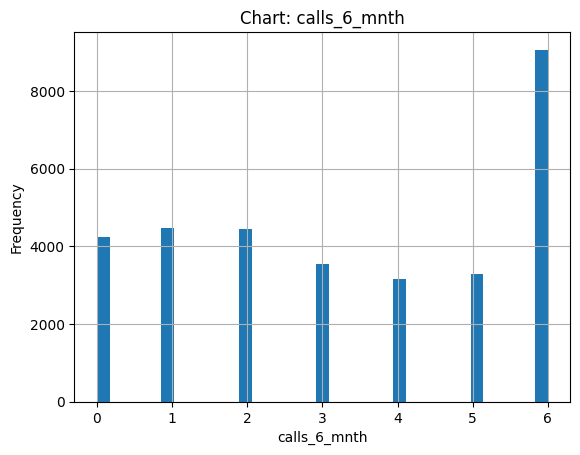

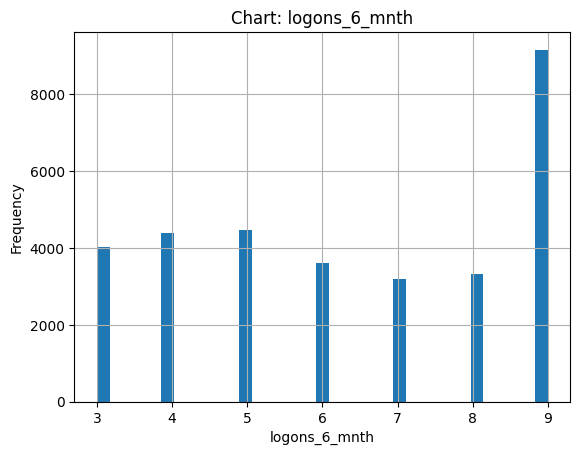

In [47]:
# Plot histograms for each numeric column with values on top
for column in control_numerical_columns:
    if column in df_control_final.columns:
        plt.figure()
        df_control_final[column].hist(bins=35)
        plt.title(f'Chart: {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


## Check for outliers

In [48]:
control_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'bt_1',
 'bt_2',
 'bt_3',
 'total_navigation',
 'total_time_visit',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth']

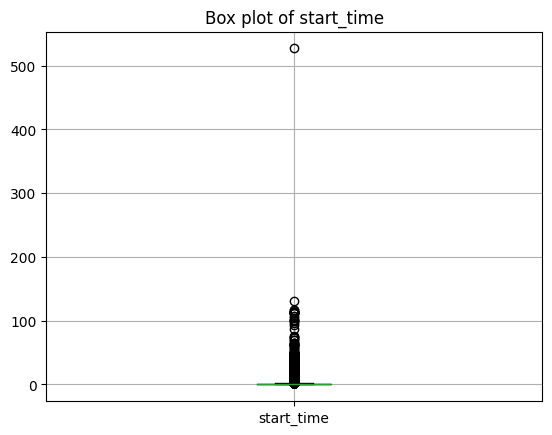

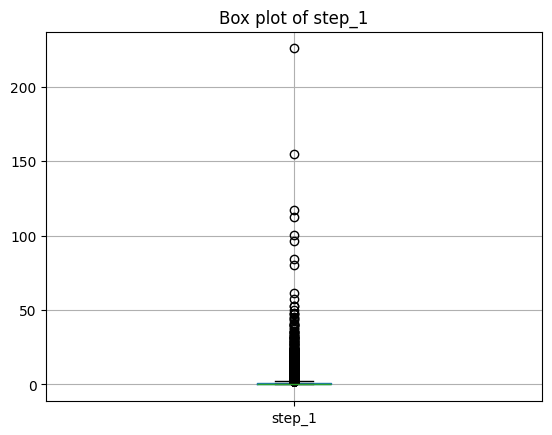

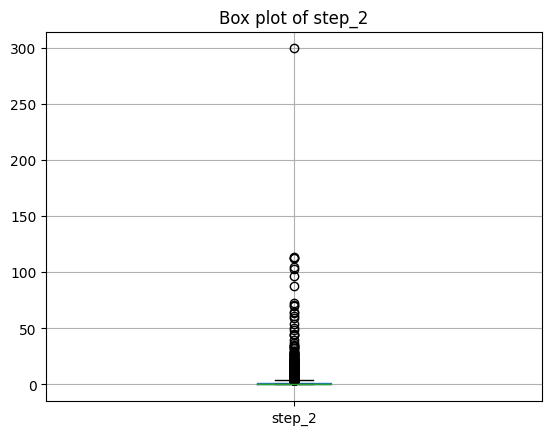

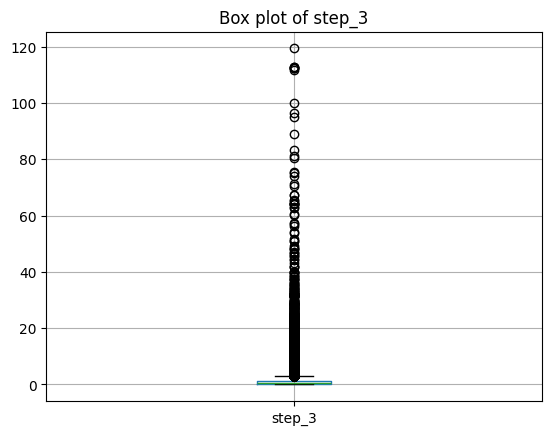

KeyError: "None of [Index(['bt_1'], dtype='object')] are in the [columns]"

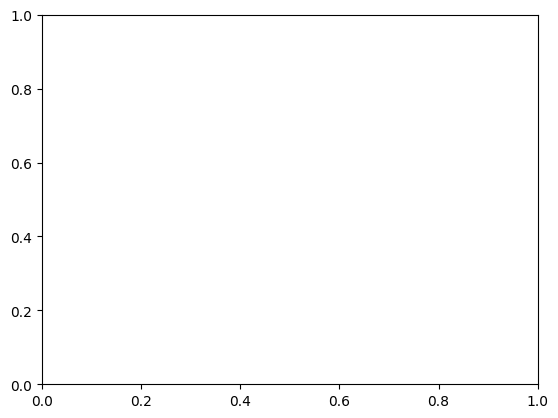

In [49]:
for column in control_numerical_columns:
    plt.figure()
    df_test_final.boxplot(column=column)
    plt.title(f'Box plot of {column}')
    plt.show()

# FINAL OF THE CONTROL


# df_test

## Check the data types

## Univariate Analysis - df_test

In [ ]:
# Convert specified columns to integer data type
df_test_final['client_id'] = df_test_final['client_id'].astype(object)
df_test_final['visit_visitor_id'] = df_test_final['visit_visitor_id'].astype(object)
df_test_final['start_time'] = round(df_test_final['start_time'].astype(float),2)
df_test_final['step_1'] = round(df_test_final['step_1'].astype(float),2)
df_test_final['step_2'] = round(df_test_final['step_2'].astype(float),2)
df_test_final['step_3'] = round(df_test_final['step_3'].astype(float),2)
df_test_final['date'] = pd.to_datetime(df_test_final.date)
df_test_final['bt_1'] = df_test_final['bt_1'].astype(int)
df_test_final['bt_2'] = df_test_final['bt_2'].astype(int)
df_test_final['bt_3'] = df_test_final['bt_3'].astype(int)
df_test_final['total_navigation'] = df_test_final['total_navigation'].astype(int)
df_test_final['last_step'] = df_test_final['last_step'].astype(object)
df_test_final['completion'] = df_test_final['completion'].astype(bool)
df_test_final['total_time_visit'] = round(df_test_final['total_time_visit'].astype(float),2)
df_test_final['Variation'] = df_test_final['Variation'].astype(object)
df_test_final['clnt_tenure_yr'] = df_test_final['clnt_tenure_yr'].astype(int)
df_test_final['clnt_tenure_mnth'] = df_test_final['clnt_tenure_mnth'].astype(int)
df_test_final['clnt_age'] = df_test_final['clnt_age'].astype(int)
df_test_final['gendr'] = df_test_final['gendr'].astype(object)
df_test_final['num_accts'] = df_test_final['num_accts'].astype(int)
df_test_final['calls_6_mnth'] = df_test_final['calls_6_mnth'].astype(int)
df_test_final['logons_6_mnth'] = df_test_final['logons_6_mnth'].astype(int)

In [ ]:
df_test_final.dtypes


## Categorical columns

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").columns


In [ ]:
test_categorical_columns = ['last_step', 'gendr']

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").nunique().sort_values(ascending=False)

In [ ]:
frequency_proportion(df_test_final, 'last_step')

In [ ]:
frequency_proportion(df_test_final, 'gendr')

In [ ]:
cross_table(df_test_final, 'start_time')

In [ ]:
frequency_proportion(df_test_final, 'start_time')

In [ ]:
tab_test_last_step = cross_table(df_test_final, 'last_step')
tab_test_last_step

In [ ]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_last_step['count'] / tab_test_last_step['count'].sum()).round(2)

In [ ]:
tab_test_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Test Group')
plt.show()

In [ ]:

tab_test_gender = cross_table(df_test_final, 'gendr')
tab_test_gender


In [ ]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_gender['count'] / tab_test_gender['count'].sum()).round(2)

In [ ]:
tab_test_gender.plot.pie(y='count', labels=tab_test_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Test Group')
plt.axis('equal')
plt.show()

## Numerical columns

### Centrality and Dispersion Measures

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").columns

In [ ]:
df_test_final.dtypes

In [ ]:

test_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'bt_1', 'bt_2', 'bt_3', 'total_navigation', 'total_time_visit', 'clnt_tenure_yr','clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

In [ ]:
test_numerical_columns

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").nunique().sort_values(ascending=False)


In [ ]:
df_test_final.describe()

In [ ]:
# Plot histograms for each numeric column with values on top
for column in test_numerical_columns:
    plt.figure()
    df_test_final[column].hist(bins=35)
    plt.title(f'Chart: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Check for outliers

In [ ]:
test_numerical_columns

In [ ]:
for column in test_numerical_columns:
    plt.figure()
    df_test_final.boxplot(column=column)
    plt.title(f'Box plot of {column}')
    plt.show()

In [ ]:
test_numerical_columns